In [11]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
class NaiveBayesDiscrete:
    def __init__(self, class_priors):
        self.class_priors = class_priors
        self.likelihoods = {}
        self.classes = []

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.likelihoods = {c: defaultdict(lambda: defaultdict(int)) for c in self.classes}
        
        for xi, label in zip(X, y):
            for idx, val in enumerate(xi):
                self.likelihoods[label][idx][val] += 1

        # Normalize likelihoods
        for c in self.classes:
            for idx in self.likelihoods[c]:
                total = sum(self.likelihoods[c][idx].values())
                for val in self.likelihoods[c][idx]:
                    self.likelihoods[c][idx][val] /= total

    def predict(self, X):
        predictions = []
        posteriors = []

        for xi in X:
            class_probs = {}
            for c in self.classes:
                prob = self.class_priors[c]
                for idx, val in enumerate(xi):
                    prob *= self.likelihoods[c][idx].get(val, 1e-6)  # Smoothing for unseen values
                class_probs[c] = prob

            total = sum(class_probs.values())
            class_posteriors = {c: class_probs[c] / total for c in class_probs}
            predicted_class = max(class_posteriors, key=class_posteriors.get)
            predictions.append(predicted_class)
            posteriors.append(class_posteriors)

        return np.array(predictions), posteriors

In [13]:
X = np.array([
    ['sunny', 'hot', 'high', 'false'],
    ['sunny', 'hot', 'high', 'true'],
    ['overcast', 'hot', 'high', 'false'],
    ['rainy', 'mild', 'high', 'false'],
    ['rainy', 'cool', 'normal', 'false'],
    ['rainy', 'cool', 'normal', 'true'],
    ['overcast', 'cool', 'normal', 'true'],
    ['sunny', 'mild', 'high', 'false'],
])
y = np.array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'])
class_priors = {'yes': 0.5, 'no': 0.5}

nb = NaiveBayesDiscrete(class_priors)
nb.fit(X, y)
predictions, posteriors = nb.predict(X)

In [14]:
print("Predictions:", predictions)
print("Posterior Probabilities:")
for i, posterior in enumerate(posteriors):
    print(f"Sample {i}: {posterior}")

Predictions: ['no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'no']
Posterior Probabilities:
Sample 0: {'no': 0.9999993333337777, 'yes': 6.666662222225185e-07}
Sample 1: {'no': 0.9999997777778271, 'yes': 2.2222217283951712e-07}
Sample 2: {'no': 3.999984000064e-06, 'yes': 0.999996000016}
Sample 3: {'no': 0.3333333333333333, 'yes': 0.6666666666666666}
Sample 4: {'no': 0.07692307692307693, 'yes': 0.9230769230769231}
Sample 5: {'no': 0.2, 'yes': 0.8}
Sample 6: {'no': 9.99999000001e-07, 'yes': 0.9999990000010001}
Sample 7: {'no': 0.9999986666684445, 'yes': 1.333331555557926e-06}


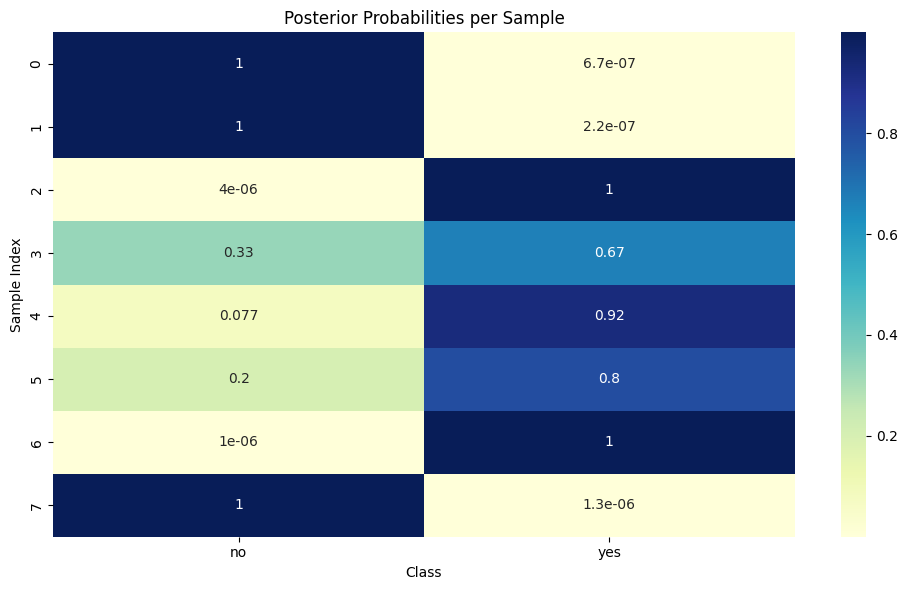

In [15]:
posterior_df = pd.DataFrame(posteriors)
posterior_df['True Label'] = y
posterior_df['Predicted Label'] = predictions
posterior_df.index.name = 'Sample'

plt.figure(figsize=(10, 6))
sns.heatmap(posterior_df.drop(columns=['True Label', 'Predicted Label']), annot=True, cmap='YlGnBu')
plt.title('Posterior Probabilities per Sample')
plt.xlabel('Class')
plt.ylabel('Sample Index')
plt.tight_layout()
plt.show()